# Analyzing Tags

Analyzing tags in the MovieLens dataset is important because tags can provide additional metadata about movies beyond their title, release date, and genre. Tags are user-generated keywords that describe different aspects of a movie, such as its plot, themes, characters, setting, mood, and style. By analyzing tags, we can gain insights into how users perceive and categorize movies, as well as identify patterns and trends in user preferences and behavior.

Our aim is to improve the accuracy and relevance of our search & filter functionality by allowing users to search and filter movies based on specific tags that match their interests and tastes.


In [19]:
import pandas as pd

import re
import string
from nltk.stem import PorterStemmer


In [20]:
ml_tags = pd.read_csv(f"./data/ml_tags_100.csv")


In [21]:
def prep_string(text: str) -> str:
    """remove punctuation, whitespace, and make lowercase"""

    # remove whitespace and apply lower-casing
    text_lstrip = str(text).lower().strip()

    # replace punctuation with empty string
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text_lstrip)
    return text


In [22]:
def stem_words(text: str) -> str:
    """normalize text by shortening words to their root (i.e., removing commoner morphological and inflexional endings from words)"""
    stemmer = PorterStemmer()
    return " ".join([stemmer.stem(word) for word in text.split()])


In [23]:
ml_tags


,Unnamed: 0,userId,movieId,tag,timestamp
0,51,87,109487,good science,1522676693
1,52,87,109487,Hans Zimmer,1522676679
2,53,87,109487,philosophical issues,1522676687
3,54,87,109487,sci-fi,1522676660
4,55,87,109487,science fiction,1522676703
...,...,...,...,...,...
11237,1093016,162400,55820,Oscar Nominee: Best Picture,1558809685
11238,1093017,162400,55820,Oscar Winner: Best Picture,1558809661
11239,1093018,162400,55820,suspense,1558809692
11240,1093019,162400,55820,tension,1558809677


In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color="white", height=756, width=756)
t = ' '.join(list(ml_tags['tag'].apply(prep_string).apply(stem_words).values))

wc.generate(t)


# Word Cloud Insights

Using word clouds to show the tags in the MovieLens dataset can provide several insights into the characteristics and preferences of movies and their users. A word cloud is a visual representation of the most commonly used words in a text, with larger and bolder words indicating higher frequency.

One of the insights we gain from analyzing the tags is user sentiment & emotion. Base on the word cloud below, we can see examples such as `creepi`, `kidnap`, `violent`, and `alcohol` which may be triggering for some users.

EDIT: Note that this was run against the full dataset - the sampled dataset will have other keywords such as `drug`, `nuditi`.


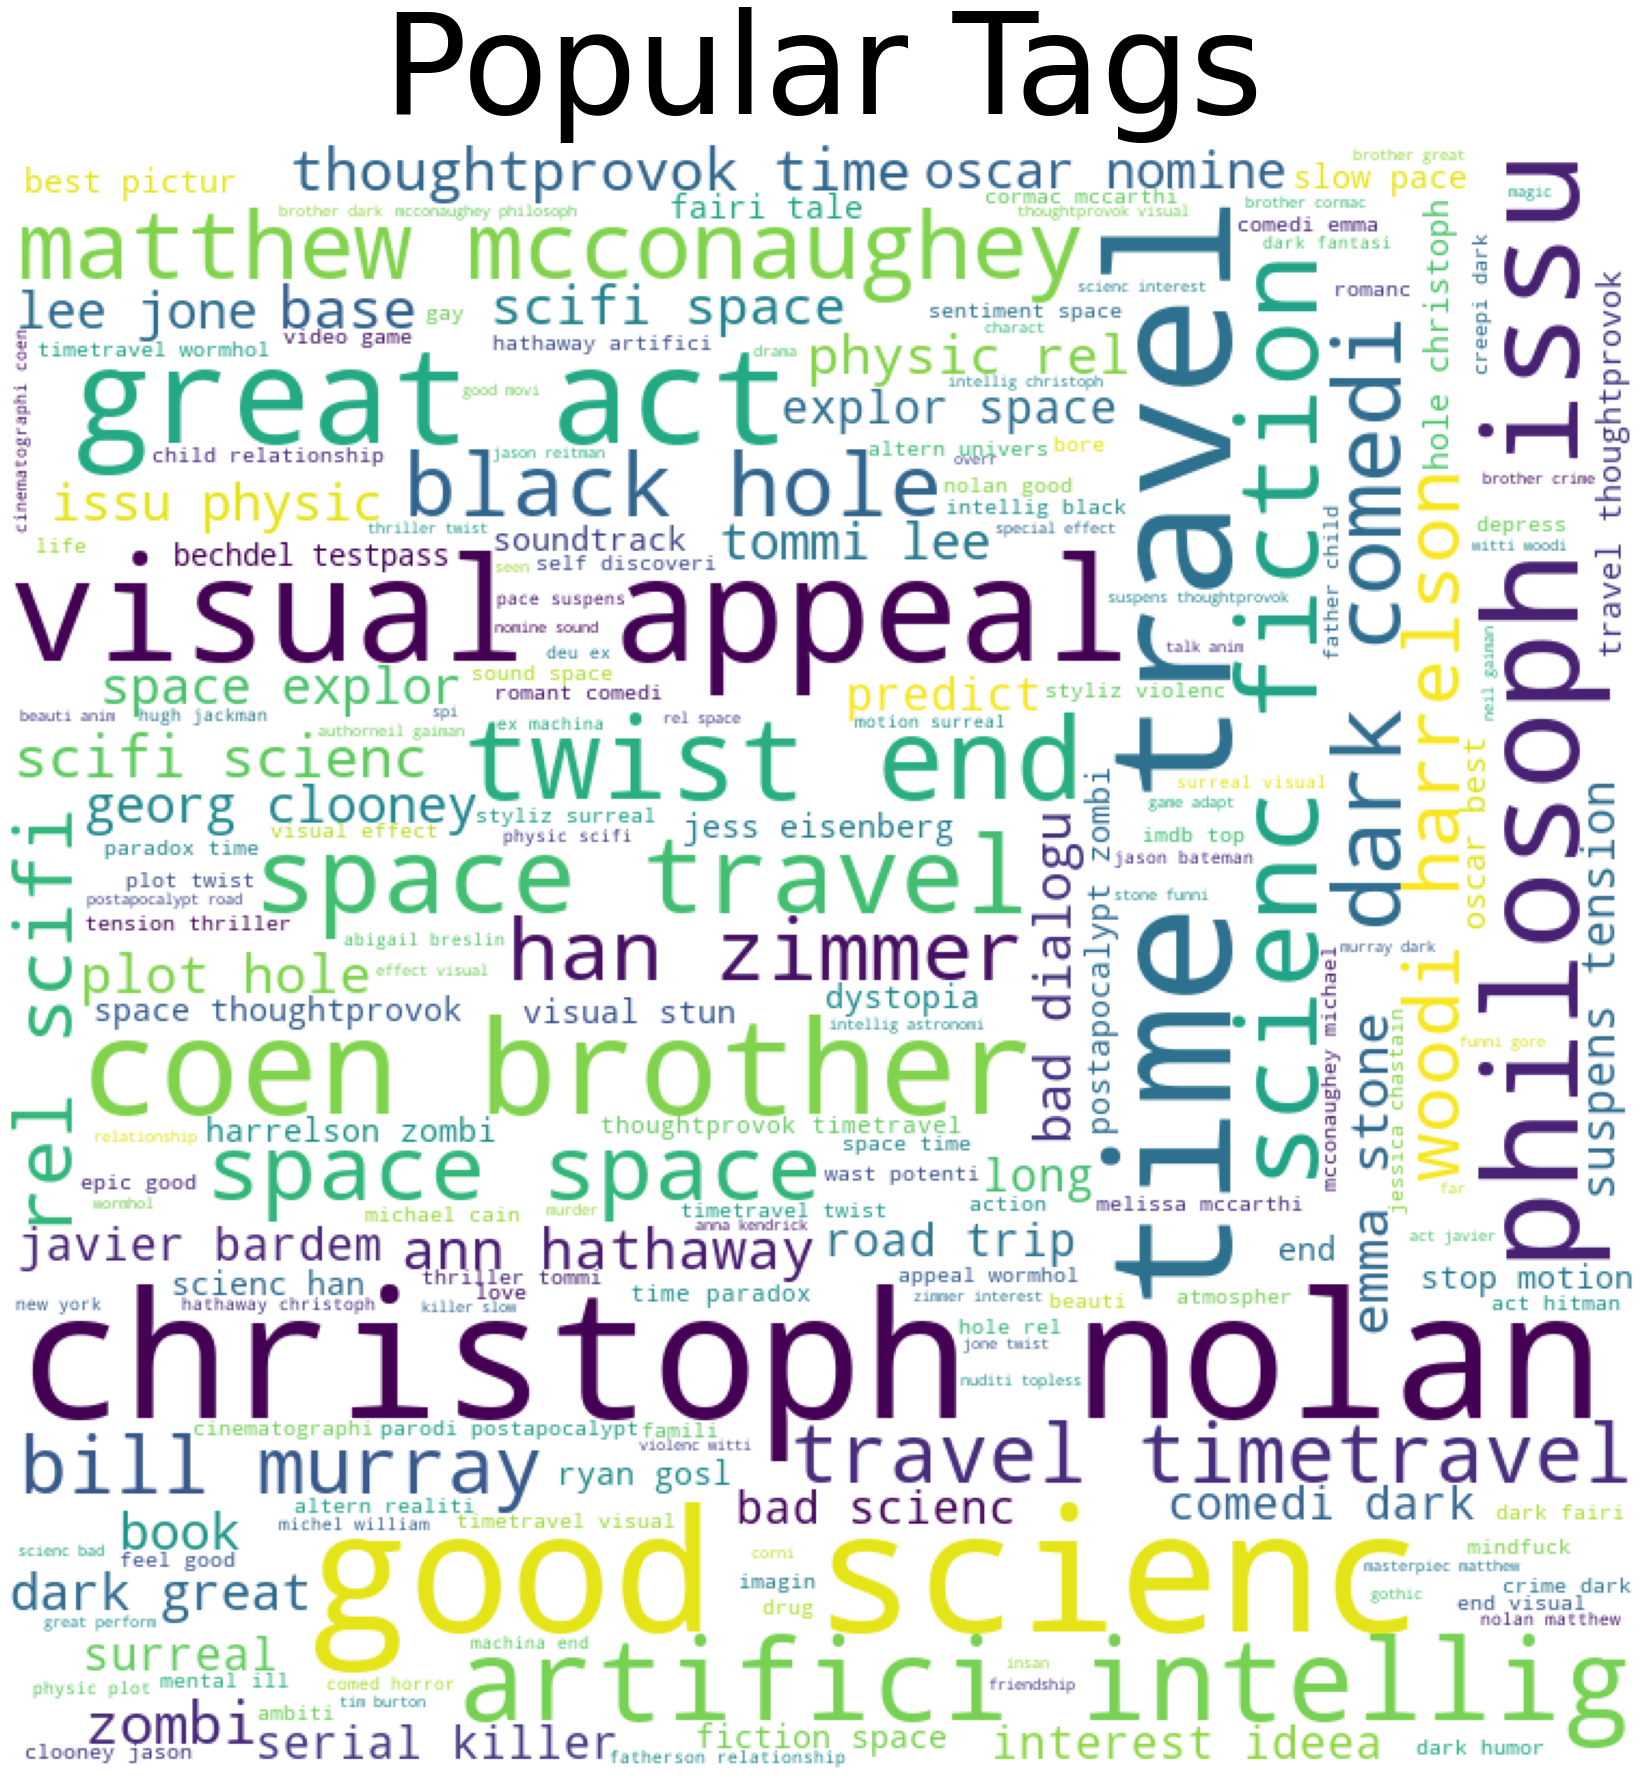

In [25]:
def plot_cloud(wordcloud, title="Popular Tags", figsize=(40, 30)):
    plt.figure(figsize=figsize)
    plt.title(title, fontsize=140)
    plt.imshow(wordcloud)
    plt.axis("off")


plot_cloud(wc)
